### Linear Regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np

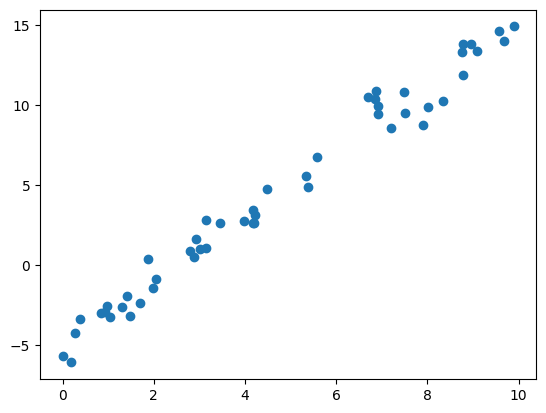

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

LinearRegression()

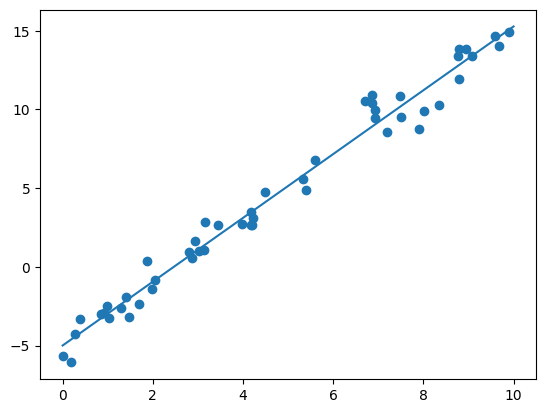

In [6]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
yfit = model.predict(x[:, np.newaxis])
mean_absolute_error(yfit, y)

0.7200436983357034

In [10]:
mean_squared_error(yfit, y)

0.818338857026618

In [11]:
r2_score(yfit, y)

0.9786330659856474

### Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [13]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

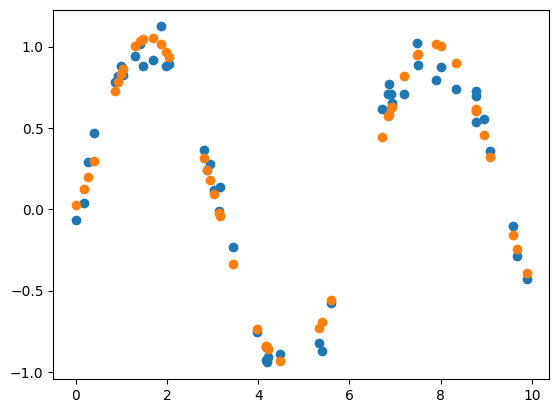

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(x[:, np.newaxis])

plt.scatter(x, y)
plt.scatter(x, yfit);

### Logistic Regression

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')
data

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity            178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color                 178 non-null    float64
 11  hue                   178 non-null    float64
 12  od                    178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [25]:
reduced = data[data['class'] <= 2]
reduced

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378
126,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342


In [30]:
X = reduced[['alcohol', 'ash']].values
X

array([[14.23,  2.43],
       [13.2 ,  2.14],
       [13.16,  2.67],
       [14.37,  2.5 ],
       [13.24,  2.87],
       [14.2 ,  2.45],
       [14.39,  2.45],
       [14.06,  2.61],
       [14.83,  2.17],
       [13.86,  2.27],
       [14.1 ,  2.3 ],
       [14.12,  2.32],
       [13.75,  2.41],
       [14.75,  2.39],
       [14.38,  2.38],
       [13.63,  2.7 ],
       [14.3 ,  2.72],
       [13.83,  2.62],
       [14.19,  2.48],
       [13.64,  2.56],
       [14.06,  2.28],
       [12.93,  2.65],
       [13.71,  2.36],
       [12.85,  2.52],
       [13.5 ,  2.61],
       [13.05,  3.22],
       [13.39,  2.62],
       [13.3 ,  2.14],
       [13.87,  2.8 ],
       [14.02,  2.21],
       [13.73,  2.7 ],
       [13.58,  2.36],
       [13.68,  2.36],
       [13.76,  2.7 ],
       [13.51,  2.65],
       [13.48,  2.41],
       [13.28,  2.84],
       [13.05,  2.55],
       [13.07,  2.1 ],
       [14.22,  2.51],
       [13.56,  2.31],
       [13.41,  2.12],
       [13.88,  2.59],
       [13.

In [35]:
y = label_binarize(reduced[['class']].values, classes = [1, 2])[:,0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
example = np.copy(data['class'].values)
np.random.shuffle(example)
example = example[0:10]
print('original:', example)
example = label_binarize(example,classes =  list(set(example)))
print('binarized:', example)
print('1s vs all:', example[:,0])

original: [2 3 1 1 2 1 2 2 1 2]
binarized: [[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]]
1s vs all: [0 0 1 1 0 1 0 0 1 0]


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('train:', len(X_train), 'test:', len(X_test))

train: 97 test: 33


In [42]:
X_train[:,0]

array([12.47, 12.29, 13.5 , 13.05, 13.9 , 14.22, 11.81, 11.76, 12.37,
       13.77, 12.72, 13.71, 12.25, 12.43, 12.6 , 13.34, 12.16, 13.51,
       13.49, 13.16, 11.65, 11.79, 11.84, 11.66, 11.64, 12.42, 13.63,
       13.05, 13.28, 13.82, 13.75, 13.29, 13.24, 14.22, 12.22, 13.07,
       12.64, 14.19, 12.42, 14.23, 12.51, 14.3 , 12.69, 13.72, 14.06,
       12.21, 12.07, 12.17, 12.29, 13.73, 13.56, 12.37, 13.2 , 12.  ,
       14.2 , 12.37, 14.1 , 13.86, 12.72, 12.33, 11.87, 14.38, 13.41,
       11.56, 13.68, 13.83, 12.08, 12.42, 11.62, 11.84, 13.58, 13.64,
       11.41, 14.02, 11.96, 12.29, 13.83, 11.61, 12.  , 12.34, 12.85,
       12.37, 13.3 , 13.88, 12.67, 14.12, 13.76, 13.67, 13.05, 13.94,
       13.56, 12.08, 14.1 , 12.04, 12.08, 13.03, 12.37])

In [44]:
y_train

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1])

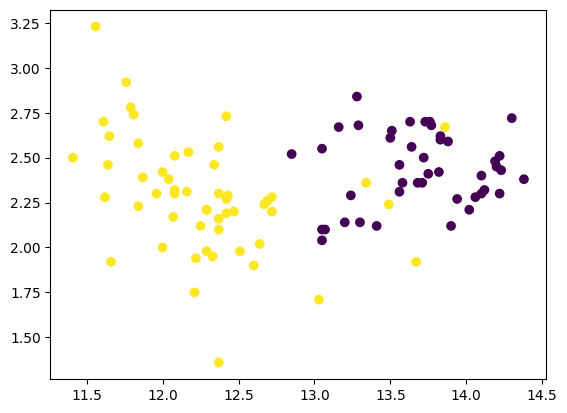

In [48]:
plt.scatter(X_train[:,0], X_train[:,1] , c = y_train )

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [52]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9394
Confusion Matrix:
[[14  1]
 [ 1 17]]


In [57]:
X = data[['alcohol', 'flavanoids']].values
y = data[['class']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_train = label_binarize(y_train, classes = [1, 2, 3])

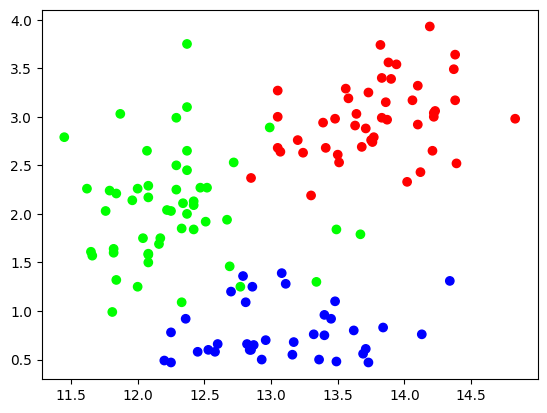

In [58]:
plt.scatter(X_train[:,0], X_train[:,1] , c = y_train )

In [60]:
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1,

In [61]:
from sklearn.multioutput import MultiOutputClassifier

In [64]:
# Initialize a base classifier
base_classifier = LogisticRegression()

# Create a MultiOutputClassifier
multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)

# Fit the model to the training data
multi_target_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_target_classifier.predict(X_test)
y_pred


array([[0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [67]:
np.argmax(y_pred,axis = 1)

array([2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1,
       1], dtype=int64)

In [71]:
# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test,axis = 1), np.argmax(y_pred,axis = 1))
class_report = classification_report(np.argmax(y_test,axis = 1), np.argmax(y_pred,axis = 1))

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5111


c:\Users\Khalid\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Khalid\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Khalid\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
